# WINE dataset


In [3]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from ucimlrepo import fetch_ucirepo

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


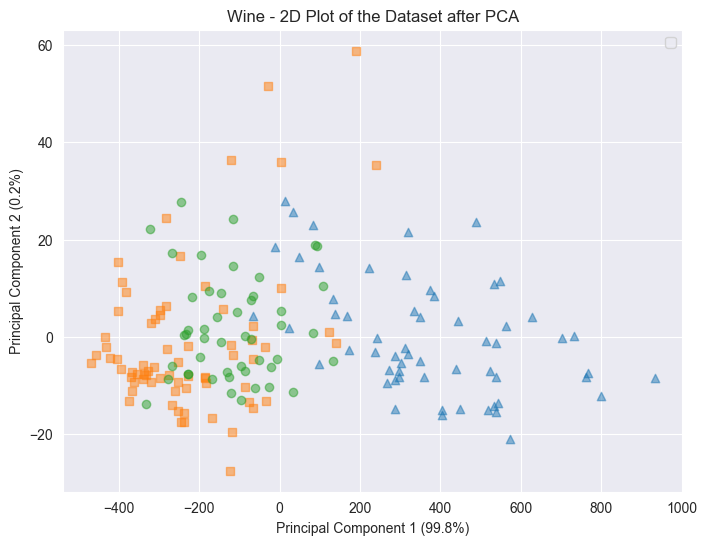

In [4]:

# fetch dataset
iris = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = pd.DataFrame(iris.data.features)
y = pd.DataFrame(iris.data.targets)
c = 3

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, ds_name="Wine", matrix_plot=False, markers=markers)

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [21]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [17.982198145134515, 17.982198145134518, 17.982198145134518, 17.982198145134518, 17.982198145134518, 17.982198145134518, 17.982231395033764, 17.9822512217675, 17.982300224925165, 17.982392350590406]
ARI values: [0.8348940044607465, 0.8348940044607465, 0.8348940044607465, 0.8348940044607465, 0.8348940044607465, 0.8348940044607465, 0.8348940044607465, 0.8348940044607465, 0.8348940044607465, 0.8348940044607465]
NS values: [1.4094946927566254, 1.3844456333494723, 1.3844456333494723, 1.3844456333494723, 1.3844456333494723, 1.3844456333494723, 1.4163773282990344, 1.3843259081549733, 1.389225105434126, 1.3680940340582912]
NMI values: [0.8215490461307173, 0.8215490461307171, 0.8215490461307171, 0.8215490461307171, 0.8215490461307171, 0.8215490461307171, 0.8215490461307173, 0.8215490461307171, 0.8215490461307173, 0.8215490461307171]


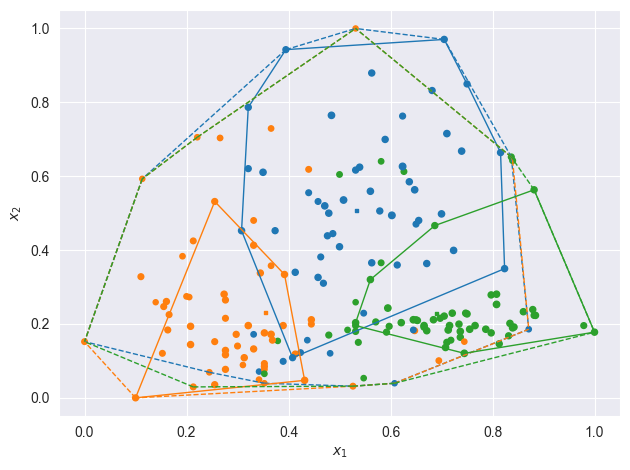

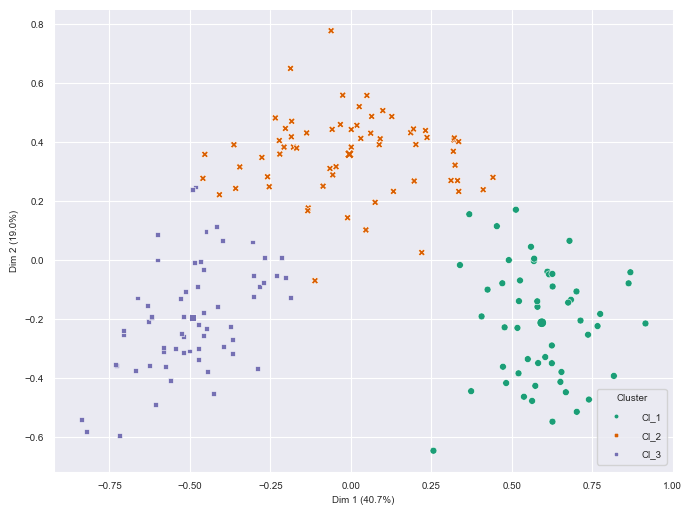

In [22]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [13]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.09271230577499578, 0.09271230577499676, 0.09271230577499676, 0.09271460915785754, 0.09271727011439107, 0.09271727011439111, 0.09271825164246489, 0.09273019762443044, 0.0927301976244305, 0.09273431885730024]
ARI values: [0.7407921417181667, 0.7407921417181667, 0.7407921417181667, 0.7407921417181667, 0.7407921417181667, 0.7407921417181667, 0.7407921417181667, 0.7407921417181667, 0.7407921417181667, 0.7407921417181667]
NS values: [1.372034784983068, 1.3933263342483377, 1.3933263342483377, 1.3992464152122872, 1.3904465518339921, 1.3587323576672055, 1.3586867683900568, 1.3933421049904209, 1.399244258380932, 1.3885054355570778]
NMI values: [0.7235245284953085, 0.7235245284953085, 0.7235245284953085, 0.7235245284953085, 0.7235245284953085, 0.7235245284953085, 0.7235245284953085, 0.7235245284953085, 0.7235245284953085, 0.7235245284953085]


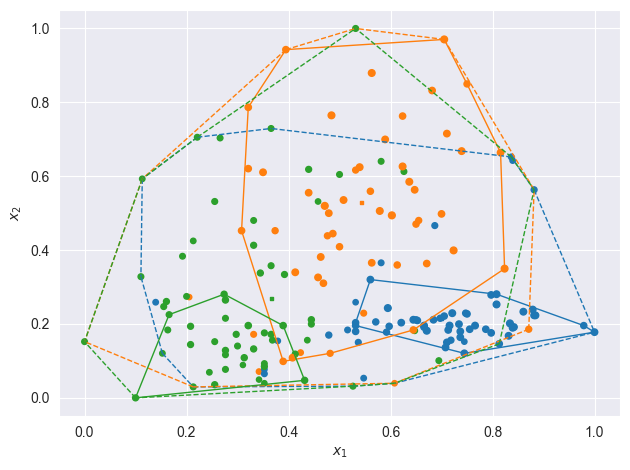

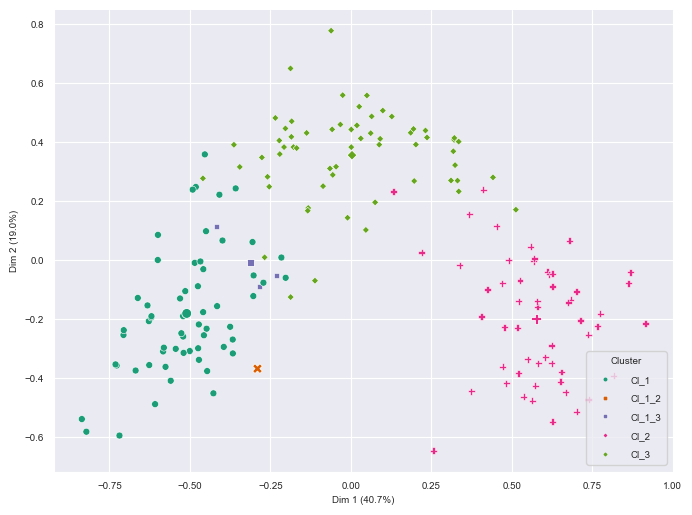

In [14]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [25]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.13346808536269242, 0.1334680855780635, 0.13346810622555214, 0.13346812826422555, 0.1334682271744776, 0.13346824971912644, 0.13346826070971232, 0.1334682771650958, 0.13346841997914735, 0.13346857592730074]
ARI values: [0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775]
NMI values: [0.41771358951741894, 0.4177135895174189, 0.4177135895174188, 0.4177135895174188, 0.4177135895174188, 0.41771358951741894, 0.4177135895174188, 0.4177135895174188, 0.4177135895174188, 0.4177135895174188]


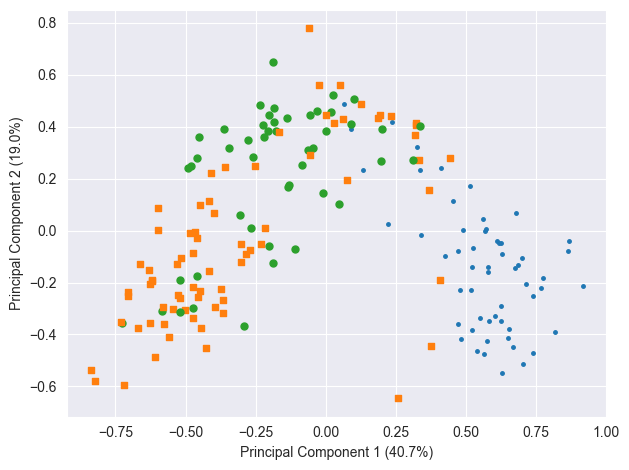

In [26]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [27]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=5, verbose=True)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [5.55019372470973, 5.5502216431994835]
ARI values: [0.8041332311110236, 0.8041332311110236]
NMI values: [0.7800353227165625, 0.7800353227165624]


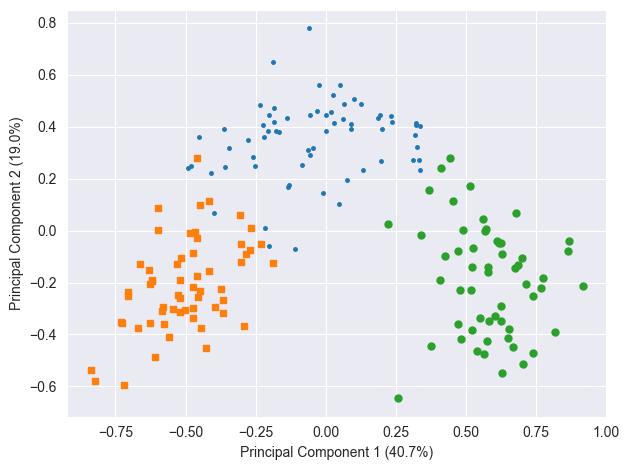

In [28]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [34]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [6.360063319926424, 6.360072036884185, 6.360072036884185, 6.3600727125980825, 6.3600727125980825, 6.360095704619399, 6.360095704619399, 6.360124359067643, 6.360160500470004, 6.360160500470005]
ARI values: [0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507]
NMI values: [0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833124]


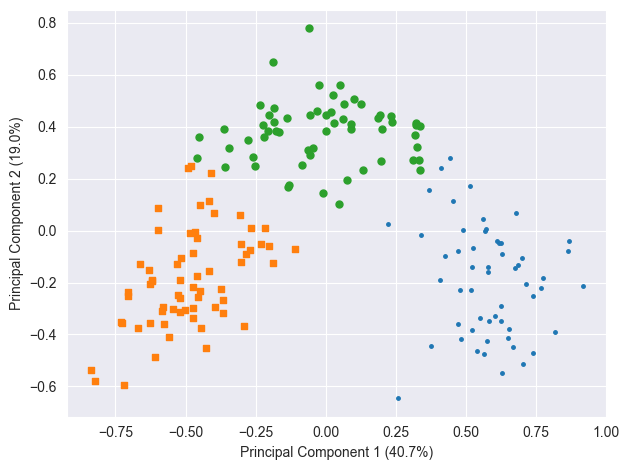

In [35]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [36]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [0.14786994883007387, 0.1478726885555064, 0.14787268855550642, 0.14787268855550642, 0.14787268855550642, 0.14787268855550642, 0.14787879448318786, 0.14787879448318786, 0.14789587461184325, 0.14789587461184325]
ARI values: [0.7724235562270082, 0.7724235562270082, 0.7724235562270082, 0.7724235562270082, 0.7724235562270082, 0.7724235562270082, 0.7724235562270082, 0.7724235562270082, 0.7724235562270082, 0.7724235562270082]
NMI values: [0.7586073862601578, 0.7586073862601579, 0.7586073862601578, 0.7586073862601578, 0.7586073862601578, 0.7586073862601578, 0.7586073862601579, 0.7586073862601579, 0.7586073862601577, 0.7586073862601577]


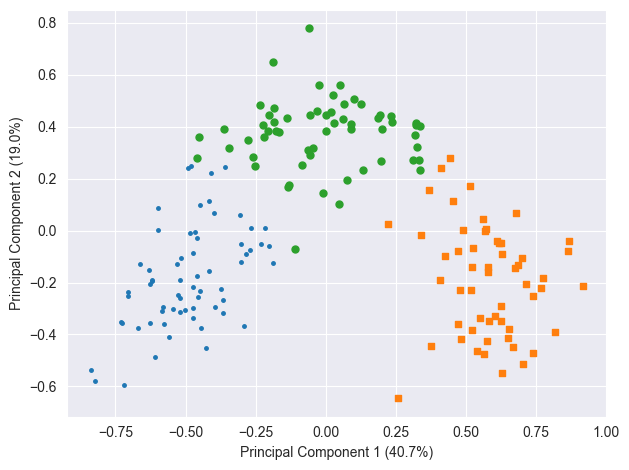

In [37]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [38]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.1633925495754721, 0.1633925495754721, 0.16339254957547222, 0.16339438687371954, 0.16339553547305136, 0.1634013487784708, 0.1634013487784708, 0.16340134877847082, 0.16340134877847082, 0.16340134877847082]
ARI values: [0.8470825705864858, 0.8470825705864858, 0.8470825705864858, 0.8470825705864858, 0.8470825705864858, 0.8625485319615126, 0.8625485319615126, 0.8625485319615126, 0.8625485319615126, 0.8625485319615126]
NMI values: [0.8211582277863079, 0.8211582277863079, 0.8211582277863079, 0.8211582277863078, 0.8211582277863078, 0.8371350604451464, 0.8371350604451464, 0.8371350604451465, 0.8371350604451464, 0.8371350604451465]


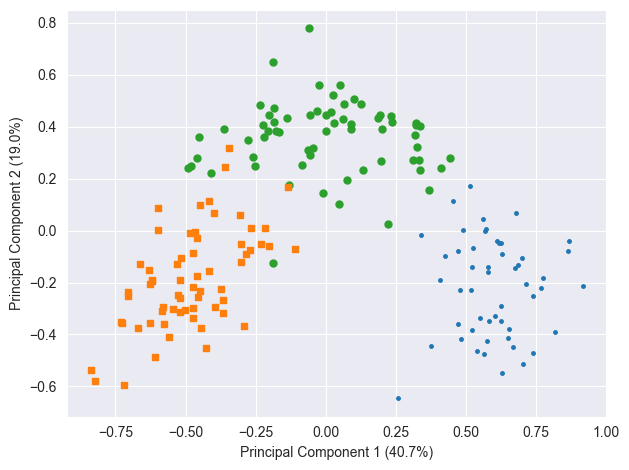

In [39]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [40]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [3.409207108166625, 3.4092071081666258, 3.4092071187762283, 3.4092071187762283, 3.40920711877623, 3.40920711877623, 3.409207131867939, 3.409207131867939, 3.4092071318679396, 3.40920713186794]
ARI values: [0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567]
NMI values: [0.806925627677794, 0.8069256276777939, 0.8069256276777939, 0.8069256276777939, 0.806925627677794, 0.806925627677794, 0.806925627677794, 0.806925627677794, 0.8069256276777939, 0.8069256276777937]


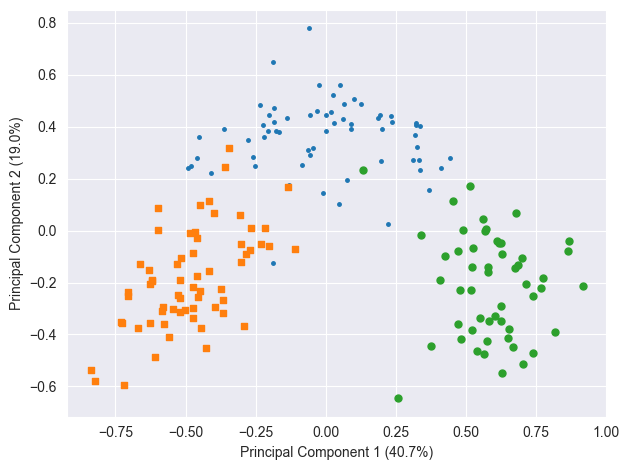

In [41]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)